In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 9.1 特殊性数据分析

### 9.1.1 数据结构的确认

9.1 数据的读取

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/'
file = 'iris.data'
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv(path + file, header=None, names=cols)

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


9.2 DataFrame 对象的 shape 属性

In [4]:
df.shape

(150, 5)

9.3 Series 对象的 value_counts 方法

In [5]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

9.4 DataFrame 对象的 info 方法

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


9.5 DataFrame 对象的 describe 方法

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


9.6 DataFrame 对象的 groupby 方法

In [8]:
df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### 9.1.2 缺失值、离群值和重复数据的确认

9.7 DataFrame 对象的 isna 方法

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

9.8 定义查找离群值的函数

In [10]:
def outlier(ser):
    mean = ser.mean()
    std = ser.std(ddof=0)
    zscore = (ser - mean) /std
    outliers = ser[(zscore < -3) | (zscore > 3)]
    if outliers.shape[0] == 0:
        print('未发现离群值')
    else:
        print(outliers)

9.9 离群值的查找（花萼的长度）

In [11]:
outlier(df['sepal_length'])

未发现离群值


9.10 离群值的查找（花萼的宽度）

In [12]:
outlier(df['sepal_width'])

15    4.4
Name: sepal_width, dtype: float64


9.11 Series 对象的 mean 方法和 std 方法

In [13]:
df['sepal_width'].mean(), df['sepal_width'].std()

(3.0540000000000003, 0.4335943113621737)

9.12 离群值的查找（花瓣的宽度和长度）

In [14]:
outlier(df['petal_width'])
outlier(df['petal_length'])

未发现离群值
未发现离群值


9.13 DataFrame 对象的 duplicated 方法

In [15]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


9.14 重复数据的修改

In [16]:
df.iloc[34,:-1] = [4.9, 3.1, 1.5, 0.2]
df.iloc[37,:-1] = [4.9, 3.6, 1.4, 0.1]

9.15 DataFrame 对象的 duplicated 方法（重新引用）

In [17]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


### 9.1.3 基于数据可视化的确认

9.16 DataFrame 对象的 plot 方法（kind='box'）

<Axes: >

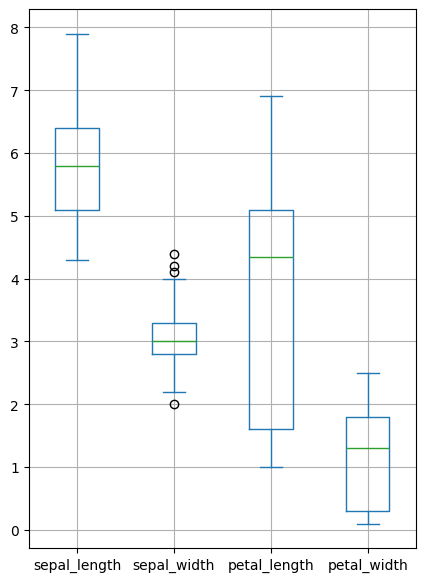

In [18]:
df.plot(kind='box', figsize=(5,7), grid=True)

9.17 按品种分离成 DataFrame 对象

In [19]:
vers = df[df['class'] == 'Iris-versicolor']
virg = df[df['class'] == 'Iris-virginica']
seto = df[df['class'] == 'Iris-setosa']

print(vers.shape, virg.shape, seto.shape)

(50, 5) (50, 5) (50, 5)


9.18 按颜色区分品种的散点图（x 轴为 petal_width、y 轴为 petal_length）

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

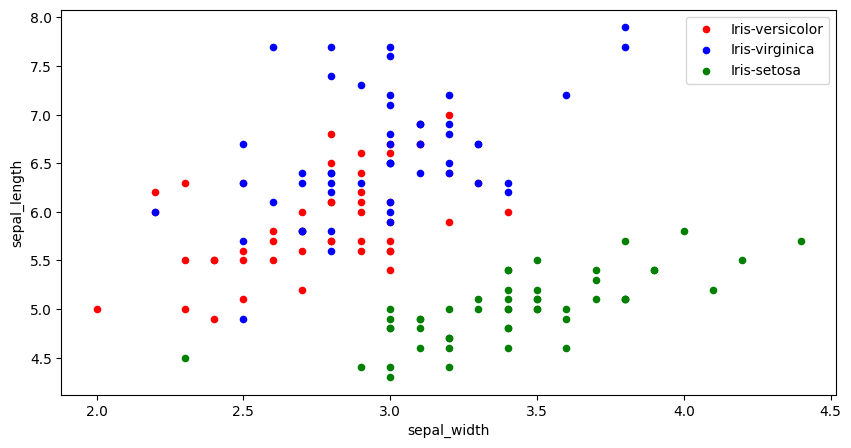

In [20]:
k, x, y = 'scatter', 'sepal_width', 'sepal_length'
ls = ['Iris-versicolor','Iris-virginica','Iris-setosa']
ax1 = vers.plot(kind=k, x=x, y=y, label=ls[0], color='r', figsize=(10,5))
virg.plot(kind=k, x=x, y=y, label=ls[1], color='b', ax=ax1)
seto.plot(kind=k, x=x, y=y, label=ls[2], color='g', ax=ax1)

9.19 按颜色区分品种的散点图（x 轴为 petal_width、y 轴为 petal_length）

<Axes: xlabel='petal_width', ylabel='petal_length'>

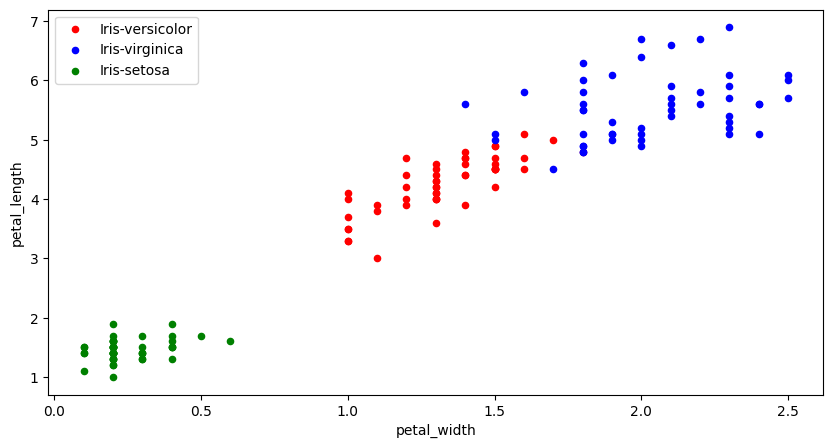

In [21]:
x, y = 'petal_width', 'petal_length'
ax1 = vers.plot(kind=k, x=x, y=y, label=ls[0], color='r', figsize=(10,5))
virg.plot(kind=k, x=x, y=y, label=ls[1], color='b', ax=ax1)
seto.plot(kind=k, x=x, y=y, label=ls[2], color='g', ax=ax1)

9.20 将标识颜色的字符串保存到列表中

In [22]:
colors=['g']*50+['r']*50+['b']*50
len(colors)==len(df)

True

9.21 : scatter_matrix方法

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

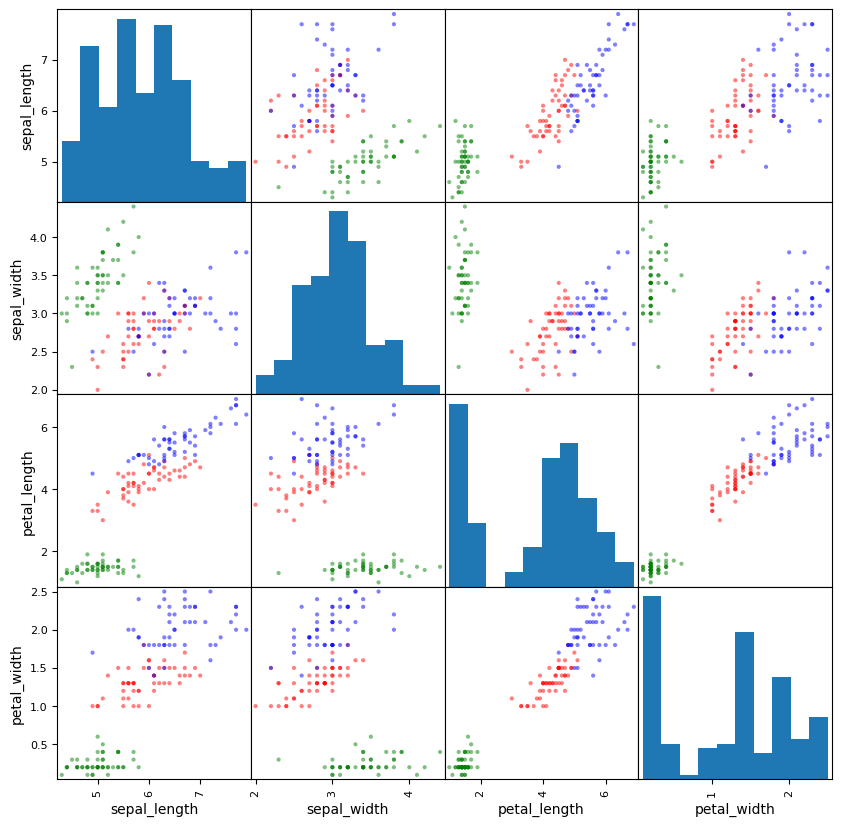

In [23]:
pd.plotting.scatter_matrix(df, color=colors, figsize=(10,10))

9.22 使用 DataFrame 对象中 corr 方法的热图

In [24]:
df.select_dtypes(include=[np.number]).corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## 9.2 整齐数据

### 9.2.1 整齐数据的概要

### 9.2.2 将杂乱数据转换为整齐数据

9.23 ex17.csv 文件的读取

In [25]:
df = pd.read_csv('./data/ex17.csv', encoding='gbk')
df

,部门,10岁,20岁,30岁
0,人事部,1,2,1
1,财务部,0,1,3
2,研发部,0,4,2


9.24 DataFrame 对象的 melt 方法

In [26]:
df = df.melt(id_vars='部门', var_name='年龄', value_name='人数')
df

,部门,年龄,人数
0,人事部,10岁,1
1,财务部,10岁,0
2,研发部,10岁,0
3,人事部,20岁,2
4,财务部,20岁,1
5,研发部,20岁,4
6,人事部,30岁,1
7,财务部,30岁,3
8,研发部,30岁,2


9.25 DataFrame 对象的 pivot 方法

In [27]:
df.pivot(index='部门', columns='年龄', values='人数').reset_index()

年龄,部门,10岁,20岁,30岁
0,人事部,1,2,1
1,研发部,0,4,2
2,财务部,0,1,3


9.26 ex18.csv 文件的读取

In [28]:
df = pd.read_csv('./data/ex18.csv', encoding='gbk' )
df

,部门,男性20岁,女性20岁,男性30岁,女性30岁
0,人事部,1,1,0,4
1,财务部,1,0,2,1


9.27 DataFrame 对象的 melt 方法

In [29]:
df = df.melt(id_vars='部门', var_name='性別年龄', value_name='人数')
df

,部门,性別年龄,人数
0,人事部,男性20岁,1
1,财务部,男性20岁,1
2,人事部,女性20岁,1
3,财务部,女性20岁,0
4,人事部,男性30岁,0
5,财务部,男性30岁,2
6,人事部,女性30岁,4
7,财务部,女性30岁,1


9.28 Series 对象的 str 属性

In [30]:
df['性別'] = df['性別年龄'].str[:2]
df['年龄'] = df['性別年龄'].str[2:]

In [31]:
df.drop('性別年龄', inplace=True, axis=1)
df

,部门,人数,性別,年龄
0,人事部,1,男性,20岁
1,财务部,1,男性,20岁
2,人事部,1,女性,20岁
3,财务部,0,女性,20岁
4,人事部,0,男性,30岁
5,财务部,2,男性,30岁
6,人事部,4,女性,30岁
7,财务部,1,女性,30岁


9.29 DataFrame 对象的 groupby 方法

In [32]:
df.groupby('年龄').sum()

,部门,人数,性別
年龄,,,
20岁,人事部财务部人事部财务部,3,男性男性女性女性
30岁,人事部财务部人事部财务部,7,男性男性女性女性


9.30 ex19.csv 文件的读取

In [33]:
df = pd.read_csv('./data/ex19.csv')
df

,name,type,1月,2月,3月
0,A店,最低,80,100,70
1,A店,最高,120,120,90
2,B店,最低,90,90,100
3,B店,最高,110,150,110


9.31 DataFrame 对象的 melt 方法

In [34]:
df_tidy = df.melt(id_vars=['name','type'], var_name='month')
df_tidy

,name,type,month,value
0,A店,最低,1月,80
1,A店,最高,1月,120
2,B店,最低,1月,90
3,B店,最高,1月,110
4,A店,最低,2月,100
5,A店,最高,2月,120
6,B店,最低,2月,90
7,B店,最高,2月,150
8,A店,最低,3月,70
9,A店,最高,3月,90


9.32 DataFrame 对象的 pivot_table 方法

In [35]:
df_tidy = df_tidy.pivot_table(index=['name','month'],
                              columns='type',
                              values='value').reset_index()

df_tidy

type,name,month,最低,最高
0,A店,1月,80.0,120.0
1,A店,2月,100.0,120.0
2,A店,3月,70.0,90.0
3,B店,1月,90.0,110.0
4,B店,2月,90.0,150.0
5,B店,3月,100.0,110.0


9.33 ex20.csv 文件的读取

In [36]:
df = pd.read_csv('./data/ex20.csv', encoding='gbk'  )
df

,name,category,# of employees,city,month,sales
0,A店,寿司,4,东京,1月,120
1,A店,寿司,4,东京,2月,100
2,A店,寿司,4,东京,3月,90
3,B店,拉面,3,大阪,1月,80
4,B店,拉面,3,大阪,2月,120
5,B店,拉面,3,大阪,3月,70
6,C店,荞麦面,6,札幌,1月,90
7,C店,荞麦面,6,札幌,2月,150
8,C店,荞麦面,6,札幌,3月,110


9.34 drop_duplicates 方法和 reset_index 方法

In [37]:
cols = ['name', 'category', '# of employees', 'city']
restaurant = df[cols].drop_duplicates().reset_index(drop=True)
restaurant

,name,category,# of employees,city
0,A店,寿司,4,东京
1,B店,拉面,3,大阪
2,C店,荞麦面,6,札幌


9.35 特定列的引用和 copy 方法

In [38]:
sales = df[['name','month','sales']].copy()
sales

,name,month,sales
0,A店,1月,120
1,A店,2月,100
2,A店,3月,90
3,B店,1月,80
4,B店,2月,120
5,B店,3月,70
6,C店,1月,90
7,C店,2月,150
8,C店,3月,110


## 9.3 数据分析实例 基于Bank Marketing 数据集

### 9.3.1 数据集的概要和数据结构

9.36 urllib 模块的 request.urlopen 函数

In [39]:
import urllib
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/'
zfile = 'bank-additional.zip'
request = urllib.request.urlopen(url + zfile)

9.37 io 模块和 zipfile 模块

In [40]:
import io, zipfile
file = zipfile.ZipFile(io.BytesIO(request.read()))
file

<zipfile.ZipFile file=<_io.BytesIO object at 0x0000019B07B154E0> mode='r'>

9.38 read_csv 函数

In [41]:
cfile = 'bank-additional/bank-additional-full.csv'
df = pd.read_csv(file.extract(cfile), sep=';', engine='python')

9.39 head 方法和 shape 属性

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.shape

(41188, 21)

### 9.3.2 数据的基本信息

9.40 删除不需要的列

In [44]:
use_cols = ['age','job','marital','education','default','housing',
            'contact','month','day_of_week','duration','campaign','y']
df = df[use_cols].copy()
df.shape

(41188, 12)

9.41 DataFrame 对象的 info 方法

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   duration     41188 non-null  int64 
 10  campaign     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


9.42 isna 方法和 sum 方法

In [46]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
y              0
dtype: int64

9.43 duplicated 方法和 sum 方法

In [47]:
df.duplicated().sum()

20

9.44 duplicated 方法和引用

In [48]:
df[df.duplicated(keep=False)][0:2]

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,y
1265,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,no
1266,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,no


9.45 drop_duplicates 方法

In [49]:
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(41168, 12)


### 9.3.3 客户数据分析

9.46 Series 对象的 value_counts 方法

In [50]:
df['job'].value_counts()

job
admin.           10418
blue-collar       9250
technician        6736
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1420
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

9.47 value_counts 方法和 plot 方法（kind='bar'）

<Axes: xlabel='education'>

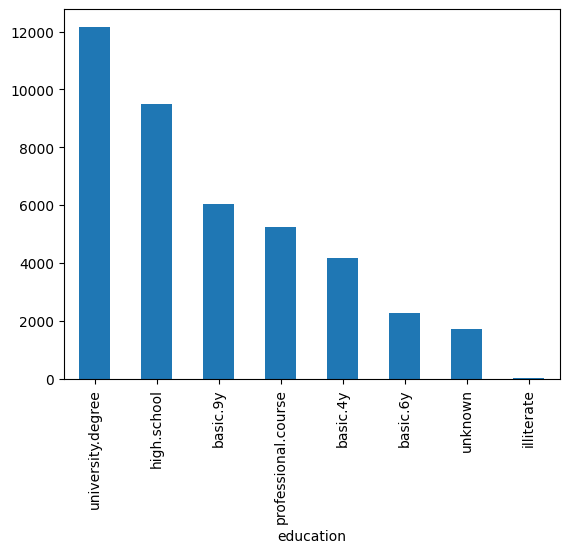

In [51]:
df['education'].value_counts().plot(kind='bar')

9.48 value_counts 方法和 plot 方法（kind='pie'）

<Axes: ylabel='count'>

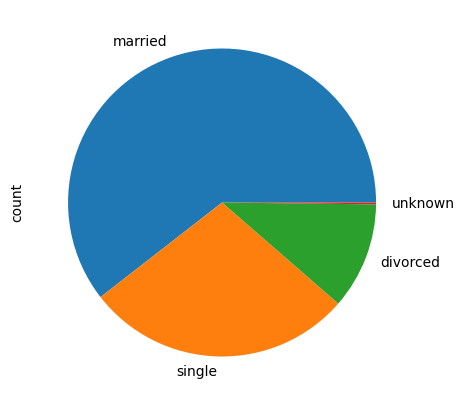

In [52]:
df['marital'].value_counts().plot(kind='pie', figsize=(5,5))

9.49 多列的 Series.value_counts 方法和 plot 方法（kind='barh'）

In [53]:
cnt = df[['default','housing','y']].apply(pd.Series.value_counts)
cnt

,default,housing,y
no,32570,18612,36529.0
unknown,8595,990,NaN
yes,3,21566,4639.0


<Axes: >

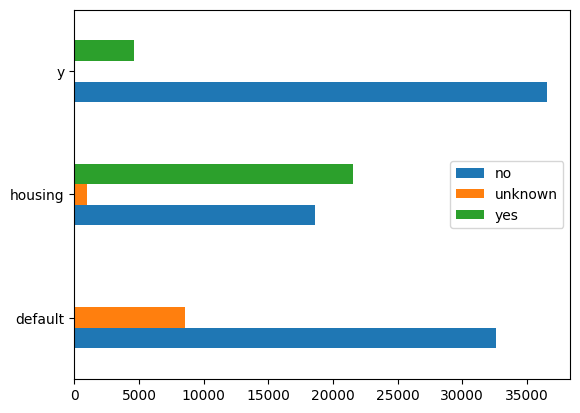

In [54]:
cnt.T.plot(kind='barh')

9.50 DataFrame 对象的 describe 方法

In [55]:
df['age'].describe()

count    41168.000000
mean        40.024436
std         10.420507
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

9.51 value_counts 方法和 plot 方法（kind='bar'）

<Axes: xlabel='age'>

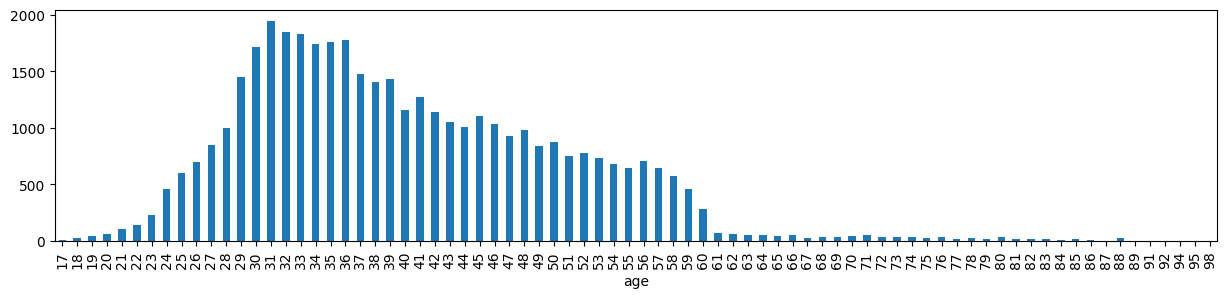

In [56]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))

9.52 success_rate 函数的定义

In [57]:
def success_rate(col):
    grouped = df.groupby([col, 'y'])
    cnt = grouped['y'].count()
    cnt.name = 'count'
    cnt = cnt.reset_index()
    cnt = cnt.pivot(index=col, columns='y', values='count')
    cnt['per'] = round(cnt['yes'] / cnt.sum(axis=1) * 100, 2)
    return cnt.sort_values(by='per', ascending=False)

9.53 列 education 的活动成功与否确认

In [58]:
success_rate('education')

y,no,yes,per
education,,,
illiterate,14,4,22.22
unknown,1479,251,14.51
university.degree,10493,1669,13.72
professional.course,4643,595,11.36
high.school,8480,1031,10.84
basic.4y,3747,428,10.25
basic.6y,2103,188,8.21
basic.9y,5570,473,7.83


9.54 列 job 的活动成功与否确认

In [59]:
success_rate('job')

y,no,yes,per
job,,,
student,600,275,31.43
retired,1284,434,25.26
unemployed,870,144,14.20
admin.,9067,1351,12.97
management,2596,328,11.22
unknown,293,37,11.21
technician,6006,730,10.84
self-employed,1271,149,10.49
housemaid,954,106,10.00


9.55 列 marital 的活动成功与否确认

In [60]:
success_rate('marital')

y,no,yes,per
marital,,,
unknown,68,12,15.00
single,9940,1620,14.01
divorced,4135,476,10.32
married,22386,2531,10.16


### 9.3.4 营销活动数据分析

9.56 Series 对象的 value_counts 方法

In [61]:
df['contact'].value_counts(dropna=False)

contact
cellular     26127
telephone    15041
Name: count, dtype: int64

9.57 DataFrame 对象的 describe 方法

In [62]:
df[['duration', 'campaign']].describe()

,duration,campaign
count,41168.000000,41168.000000
mean,258.335941,2.568135
std,259.324728,2.770520
min,0.000000,1.000000
25%,102.000000,1.000000
50%,180.000000,2.000000
75%,319.000000,3.000000
max,4918.000000,56.000000


9.58 基于列 duration 的值的索引引用

In [63]:
df[df['duration'] > 4000]

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,y
22192,52,blue-collar,married,basic.4y,no,no,telephone,aug,thu,4199,3,yes
24091,33,technician,single,professional.course,no,yes,telephone,nov,mon,4918,1,no


9.59 cut 函数和 value_counts 方法

In [64]:
df['duration_bins'] = pd.cut(df['duration'], 5)
df['duration_bins'].value_counts()

duration_bins
(-4.918, 983.6]     40158
(983.6, 1967.2]       943
(1967.2, 2950.8]       52
(2950.8, 3934.4]       13
(3934.4, 4918.0]        2
Name: count, dtype: int64

9.60 groupby 方法和 size 方法

In [65]:
grouped = df.groupby(['duration_bins','y'])[['y']].size()
grouped

C:\Users\liye\AppData\Local\Temp\ipykernel_13252\1738093771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['duration_bins','y'])[['y']].size()


duration_bins     y  
(-4.918, 983.6]   no     36117
                  yes     4041
(983.6, 1967.2]   no       388
                  yes      555
(1967.2, 2950.8]  no        15
                  yes       37
(2950.8, 3934.4]  no         8
                  yes        5
(3934.4, 4918.0]  no         1
                  yes        1
dtype: int64

9.61 reset_index 方法和 pivot 方法

In [66]:
grouped.reset_index().pivot(index='duration_bins', columns='y', values=0)

y,no,yes
duration_bins,,
"(-4.918, 983.6]",36117,4041
"(983.6, 1967.2]",388,555
"(1967.2, 2950.8]",15,37
"(2950.8, 3934.4]",8,5
"(3934.4, 4918.0]",1,1


9.62 value_counts 方法和 plot 方法（kind='barh'）

<Axes: ylabel='month'>

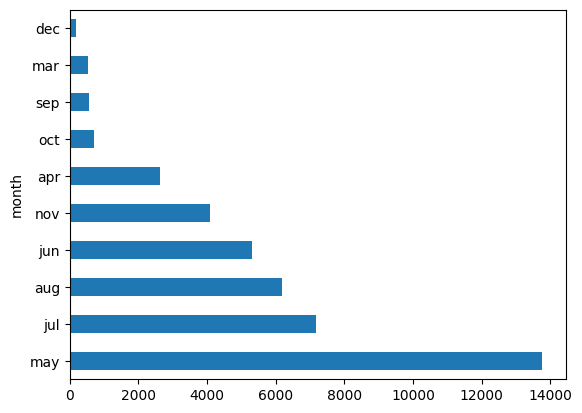

In [67]:
df['month'].value_counts().plot(kind='barh')

<Axes: ylabel='day_of_week'>

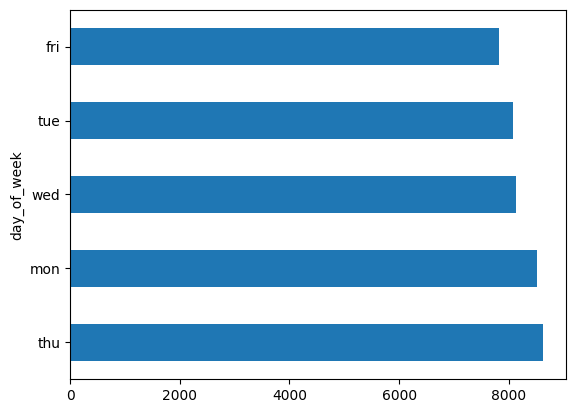

In [68]:
df['day_of_week'].value_counts().plot(kind='barh')

9.63 列 month 的活动成功与否

In [69]:
success_rate('month')

y,no,yes,per
month,,,
mar,270,276,50.55
dec,93,89,48.90
sep,314,256,44.91
oct,402,315,43.93
apr,2092,539,20.49
aug,5518,655,10.61
jun,4759,559,10.51
nov,3683,416,10.15
jul,6521,648,9.04


9.64 列 day_of_week 的活动成功与否

In [70]:
success_rate('day_of_week')

y,no,yes,per
day_of_week,,,
thu,7572,1044,12.12
tue,7131,953,11.79
wed,7182,949,11.67
fri,6980,846,10.81
mon,7664,847,9.95
